In [1]:
from fsds_100719.imports import *

fsds_1007219  v0.7.16 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
import os

In [3]:
os.listdir('novel-corona-virus-2019-dataset/')

['COVID19_open_line_list.csv',
 'time_series_covid_19_recovered.csv',
 'covid_19_data.csv',
 'COVID19_line_list_data.csv',
 'time_series_covid_19_deaths.csv',
 'time_series_covid_19_confirmed.csv']

In [42]:
df_ = pd.read_csv('novel-corona-virus-2019-dataset/covid_19_data.csv',index_col=0)
df_

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...
4931,03/11/20,Mississippi,US,2020-03-10T02:33:04,0,0,0
4932,03/11/20,North Dakota,US,2020-03-10T02:33:04,0,0,0
4933,03/11/20,West Virginia,US,2020-03-10T02:33:04,0,0,0


In [4]:
df_ts_conf = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
df_ts_conf

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990,990,NaN
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,428,428,429,NaN
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,NaN
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296,296,296,296,296,296,296,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,102,119,120,124,124,125,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
400,NaN,Jamaica,18.1096,-77.2975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
401,NaN,Reunion,-21.1151,55.5364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
402,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


In [12]:
df = pd.melt(df_ts_conf,id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Day', value_name='Cases')
df

,Province/State,Country/Region,Lat,Long,Day,Cases
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1.0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14.0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6.0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1.0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0.0
...,...,...,...,...,...,...
20195,Saint Barthelemy,France,17.9000,-62.8333,3/11/20,1.0
20196,NaN,Jamaica,18.1096,-77.2975,3/11/20,1.0
20197,NaN,Reunion,-21.1151,55.5364,3/11/20,1.0
20198,NaN,Turkey,38.9637,35.2433,3/11/20,1.0


In [13]:
df['date'] = pd.to_datetime(df['Day'])


In [16]:
sorted(df['Country/Region'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cruise Ship',
 'Cyprus',
 'Czech Republic',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Faroe Islands',
 'Finland',
 'France',
 'French Guiana',
 'Georgia',
 'Germany',
 'Gibraltar',
 'Greece',
 'Holy See',
 'Honduras',
 'Hong Kong SAR',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Korea, South',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macao SAR',
 'Mainland China',

In [22]:
TS = {}
for country in df.groupby('Country/Region').groups:
    ts_temp = df.groupby('Country/Region').get_group(country)
    ts_temp.set_index('date',inplace=True)
    TS[country] =ts_temp

In [54]:
def get_country_ts(df, country,group_col='Country/Region',ts_col='Cases'):
    ts = df.groupby(group_col).get_group(country )
    ts.set_index('date',inplace=True)

    if ts_col is not None:
        return ts[ts_col]
    else:
        return ts
usa = get_country_ts(df,'US')
usa




date
2020-01-22    1.0
2020-01-22    0.0
2020-01-22    0.0
2020-01-22    0.0
2020-01-22    0.0
             ... 
2020-03-11    NaN
2020-03-11    NaN
2020-03-11    NaN
2020-03-11    NaN
2020-03-11    NaN
Name: Cases, Length: 9650, dtype: float64

In [50]:

usa.iloc[-10:]

date
2020-03-11   NaN
2020-03-11   NaN
2020-03-11   NaN
2020-03-11   NaN
2020-03-11   NaN
2020-03-11   NaN
2020-03-11   NaN
2020-03-11   NaN
2020-03-11   NaN
2020-03-11   NaN
Name: Cases, dtype: float64

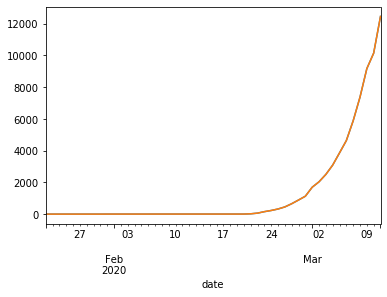

In [47]:
italy = get_country_ts(df,'Italy')
italy.plot()
italy.plot()

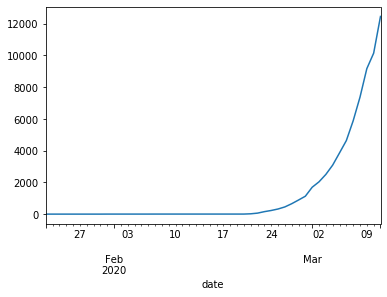

In [20]:
ts = df.groupby('Country/Region').get_group('Italy')
ts.set_index('date',inplace=True)
ts.drop(columns=['Province/State','Day','Country/Region'])['Cases'].plot()

In [26]:
'America' in TS

False

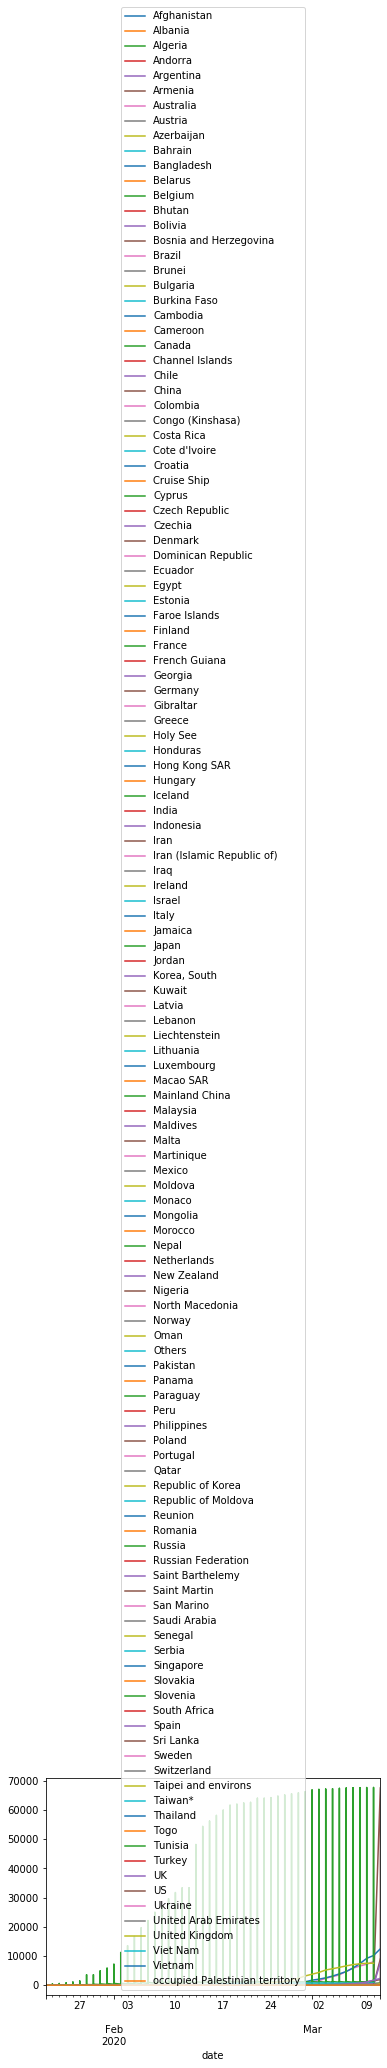

In [24]:
for country in TS:
    TS[country]['Cases'].plot(label=country)

plt.legend()